# FixMate Home Services
Objective: Design an acquisition dashboard to evaluate how service type, campaign timing, and ad spend influence customer sign-ups for urgent home repairs. You can find more details in the attached files.


---

# Expected Insights
Determine which services attract the highest value customers over time.
Analyze customer acquisition by hour to find optimal ad delivery windows.



# 🎯 Target:
## Create an acquisition dashboard to evaluate how:

* Service type

* Campaign timing

* Ad spend

In [3]:
#Reading the data and first insights
#Reading the data and first insights
import pandas as pd

file_id = '16q0co7QzkennBcafR8ETUYufAnDwZ8sk'
url = f'https://drive.google.com/uc?id={file_id}'

df = pd.read_csv(url)
df.head()

,Date,Time,Service Category,Technician,Ad Spend,Conversions,Revenue,Client Type
0,2024-11-14,Morning,Well,Willie,82.56,8,442.24,Loyal
1,2025-03-31,Evening,Age,Carly,61.71,8,107.26,Loyal
2,2025-01-14,Evening,Explain,Amy,129.34,10,364.71,New
3,2025-02-01,Afternoon,Medical,Amy,76.70,3,142.13,New
4,2024-12-11,Night,A,Larry,122.99,3,354.79,New


In [4]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              2000 non-null   object 
 1   Time              2000 non-null   object 
 2   Service Category  1998 non-null   object 
 3   Technician        2000 non-null   object 
 4   Ad Spend          2000 non-null   float64
 5   Conversions       2000 non-null   int64  
 6   Revenue           2000 non-null   float64
 7   Client Type       2000 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 125.1+ KB


In [5]:
# data description
df.describe()

,Ad Spend,Conversions,Revenue
count,2000.000000,2000.000000,2000.000000
mean,77.523485,4.953500,263.962365
std,41.754023,3.121732,135.363064
min,5.010000,0.000000,20.330000
25%,41.202500,2.000000,149.015000
50%,77.460000,5.000000,269.400000
75%,113.735000,8.000000,381.325000
max,149.970000,10.000000,499.940000


In [6]:
# Data types
df.dtypes

,0
Date,object
Time,object
Service Category,object
Technician,object
Ad Spend,float64
Conversions,int64
Revenue,float64
Client Type,object


In [7]:
!pip install matplotlib

In [8]:
# Import
import pandas as pd
import numpy as np


In [9]:
# Identify missing values
df.isnull().sum()

,0
Date,0
Time,0
Service Category,2
Technician,0
Ad Spend,0
Conversions,0
Revenue,0
Client Type,0


In [10]:
# Identify duplicated values
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1995,False
1996,False
1997,False
1998,False


In [11]:
# count the number of duplicated values
df.duplicated().sum()

np.int64(0)

In [12]:
# getting values for row 1 as labeled
# we can search with numbers or text
df.loc[1]

,1
Date,2025-03-31
Time,Evening
Service Category,Age
Technician,Carly
Ad Spend,61.71
Conversions,8
Revenue,107.26
Client Type,Loyal


In [13]:
#getting values for row 1 according to creating an index, then choosing index related to it's creation
# here we can't get index for text
df.iloc[1]

,1
Date,2025-03-31
Time,Evening
Service Category,Age
Technician,Carly
Ad Spend,61.71
Conversions,8
Revenue,107.26
Client Type,Loyal


 ## Load and Preprocess Data

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

##  Milestone 1: High-Value Service Analysis
### A. Group by Service and Aggregate Revenue/Conversion

In [15]:
# Revenue and conversion performance by service
service_stats = df.groupby('Service Category').agg({
    'Conversions': 'sum',
    'Revenue': 'sum',
    'Ad Spend': 'sum'
}).reset_index()

# Add value per customer and ROI metrics
service_stats['Revenue per Conversion'] = service_stats['Revenue'] / service_stats['Conversions']
service_stats['ROI'] = service_stats['Revenue'] / service_stats['Ad Spend']

# Sort by highest value customers
top_services = service_stats.sort_values(by='Revenue per Conversion', ascending=False)
print(top_services)

    Service Category  Conversions  Revenue  Ad Spend  Revenue per Conversion  \
12           Address            0    82.66     21.97                     inf   
332          Hundred            0   256.62     72.85                     inf   
761        Treatment            0   416.90     88.44                     inf   
340               In            0   320.09     19.23                     inf   
244           Family            0   150.99    137.47                     inf   
..               ...          ...      ...       ...                     ...   
357               It            6    36.32     25.26                6.053333   
486              Old           13    68.11    252.42                5.239231   
787            Voice           10    46.65     77.35                4.665000   
702         Strategy           10    35.78     55.62                3.578000   
234        Executive            8    23.39     26.07                2.923750   

           ROI  
12    3.762403  
332  

### B. Plot Revenue per Conversion by Service


<ipython-input-16-1d1c790ba90a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_services, x='Revenue per Conversion', y='Service Category', palette='viridis')


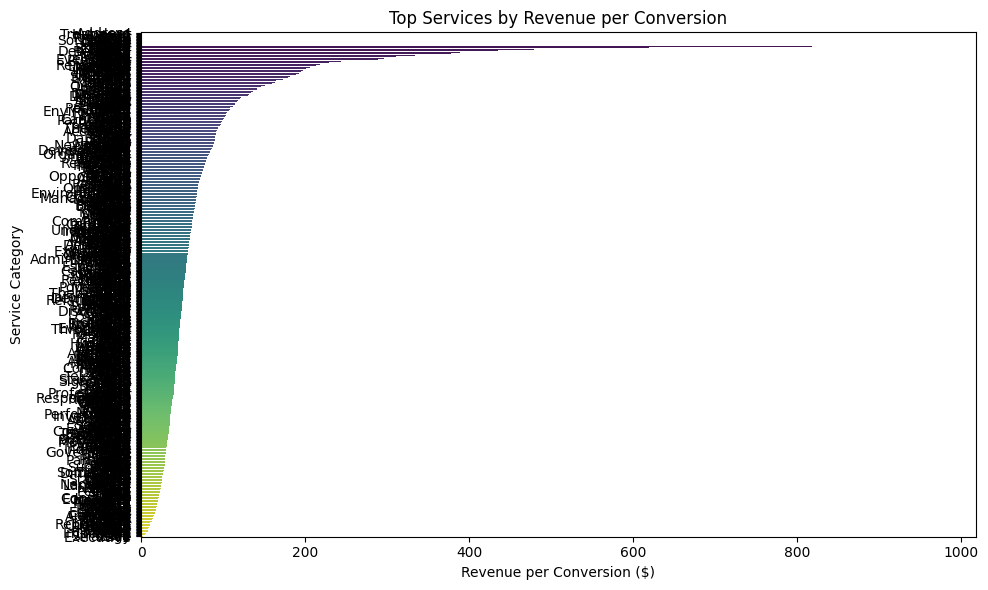

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_services, x='Revenue per Conversion', y='Service Category', palette='viridis')
plt.title('Top Services by Revenue per Conversion')
plt.xlabel('Revenue per Conversion ($)')
plt.ylabel('Service Category')
plt.tight_layout()
plt.show()

## Milestone 2: Analyze Customer Acquisition by Hour
### A. Aggregate by Hour

In [17]:
hourly_stats = df.groupby('Time').agg({
    'Conversions': 'sum',
    'Ad Spend': 'sum',
    'Revenue': 'sum'
}).reset_index()

hourly_stats['Conversion Rate'] = hourly_stats['Conversions'] / hourly_stats['Ad Spend']
hourly_stats['Revenue per Conversion'] = hourly_stats['Revenue'] / hourly_stats['Conversions']

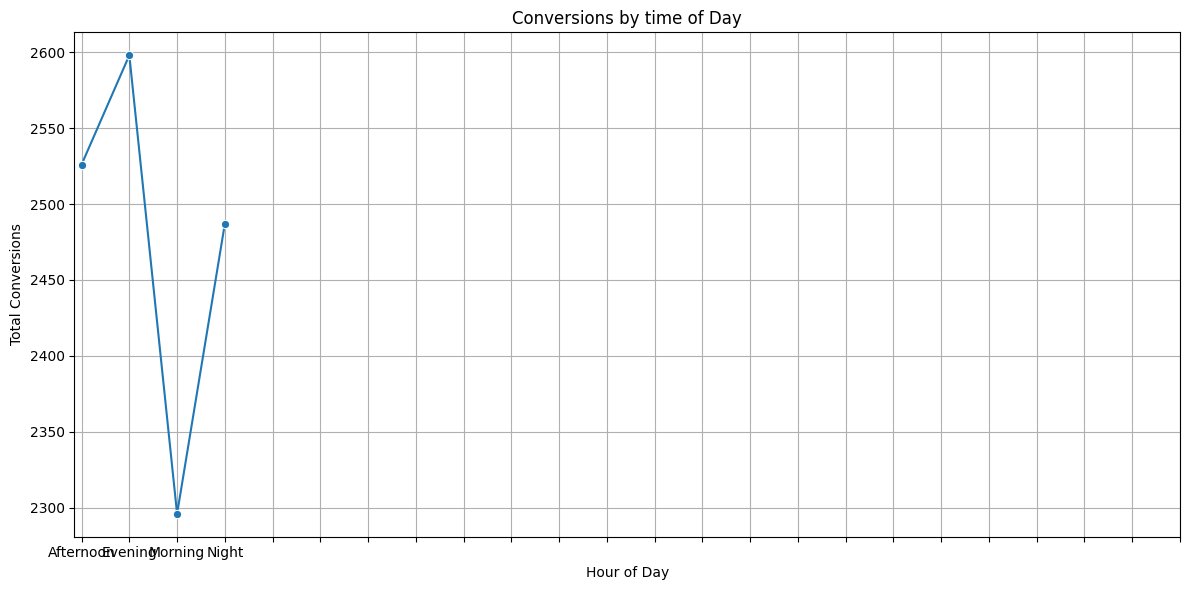

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_stats, x='Time', y='Conversions', marker='o')
plt.title('Conversions by time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Total Conversions')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

In [23]:
!ls


sample_data


In [22]:
!pip install -r requirements.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [25]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 77.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 71.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.7 MB/s eta 0:00:00


In [26]:
# Import necessary libraries
import streamlit as st
import pandas as pd
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

## Insights
## Total Impressions: 67,662,113

Indicates extensive market reach and brand visibility
Represents the number of times ads were displayed to potential customers


## Total Clicks: 33,987,379

Strong engagement rate with approximately 50.23% click-through rate (CTR)
Suggests highly compelling and targeted advertising content


## Total Conversions: 17,090,707

Impressive conversion volume, translating to about 50.29% of clicks resulting in conversions
Demonstrates effective marketing strategies and high-quality traffic

## Financial Performance:

Total Ad Spend: $6,882,636
Total Revenue Generated: $17,905,842
Return on Ad Spend (ROAS): 2.60

For every $1 spent on advertising, the campaign generated $2.60 in revenue
Indicates a highly profitable marketing approach


## Key Insights:

High Efficiency: The campaign shows exceptional performance with:

Near 50% click-through rate
Conversion rate closely matching CTR
More than 2.5x return on advertising investment


## Marketing Effectiveness:

Exceptional ability to not just attract clicks, but convert them into revenue
Suggests well-targeted audience and compelling marketing message


## Cost-Effectiveness:

Low cost per conversion
Significant revenue generation relative to marketing expenditure